<a href="https://colab.research.google.com/github/Dericko681/moja_global-outreachy_intership/blob/master/Task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is associated the development of a FLINT forest monitoring tool using land sector data set.
It is an open source project by moja global

https://github.com/moja-global/About_moja_global

TASK 1:
Once comfortable, please study the existing FLINTcloud templates and the Land Sector Datasets repository. Find an appropriate forest dataset and propose a location of interest (pick a forest you like!). Find another datasets of interest and document a workflow to extract and summarise forest squares in your location

in this notebook, we will work with five datasets, locations of interest inlcude Kenya, solomon Islands, DRC, Cameroon and Ghana

In [2]:
#to begin, let's import some important python libraries
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import geopandas as gpd


after importing the python libraries, let's uplaod our datasets

https://github.com/moja-global/Land_Sector_Datasets

In [3]:
url1="/content/CMR_Cameroon_SDPT.json"
url2="/content/COD_Democratic Republic of Congo_SDPT.json"
url3="/content/GHA_Ghana_SDPT.json"
url4="/content/KEN_Kenya_SDPT.json"
url5="/content/SLB_Solomon Islands_SDPT.json"

#reading the jsosn files

df_CMR= pd.read_json(url1)
df_COD= pd.read_json(url2)
df_GHA = pd.read_json(url3)
#df_KEN = pd.read_json(url4)
df_SLB=pd.read_json(url5)
df_COD

,type,name,features
0,FeatureCollection,COD_Democratic Republic of Congo_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
1,FeatureCollection,COD_Democratic Republic of Congo_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
2,FeatureCollection,COD_Democratic Republic of Congo_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
3,FeatureCollection,COD_Democratic Republic of Congo_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
4,FeatureCollection,COD_Democratic Republic of Congo_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
...,...,...,...
397,FeatureCollection,COD_Democratic Republic of Congo_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
398,FeatureCollection,COD_Democratic Republic of Congo_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
399,FeatureCollection,COD_Democratic Republic of Congo_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
400,FeatureCollection,COD_Democratic Republic of Congo_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."


In [4]:
# reading the dataframes.
df_CMR['features'][0]
df_COD['features'][0]
df_GHA['features'][0]
#df_KEN['features'][0]
df_SLB['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[160.2063522258, -9.4964052202],
    [160.208077335, -9.4896832429],
    [160.198678464, -9.4878391606],
    [160.1892201065, -9.4765367208],
    [160.1822006966, -9.4754064768],
    [160.179642776, -9.4837345904],
    [160.1798212356, -9.4876012145],
    [160.1815463448, -9.4880176202],
    [160.1824981292, -9.4892668372],
    [160.1816653179, -9.4913488656],
    [160.1799402086, -9.4936093535],
    [160.179523803, -9.4951560032],
    [160.1804755874, -9.495929328],
    [160.1838663193, -9.4964647068],
    [160.1858888611, -9.4990821139],
    [160.1893730948, -9.4986423562],
    [160.190290864, -9.5027702784],
    [160.1958825974, -9.5034246302],
    [160.1976671931, -9.5078861196],
    [160.1984405179, -9.50770766],
    [160.2011174116, -9.5019374671],
    [160.2023666286, -9.5024133593],
    [160.2036158456, -9.5033056571],
    [160.2052814683, -9.505625631600001],
    [160.2071255506, -9.5063394699],
    [160.2

next, we will analyse and visualise interesting findings in our data sets, one conutry at a time
to begin, let's define a fucntion get_df() which takes a url and returns the json files as a table of rows and columns

In [5]:
#let's read the json files
def get_df(url):
    try:
        return gpd.read_file(url)
    except Exception as e:
        print(f"Error: {e}")
        try:
            # Retrieve data from the URL
            req = requests.get(url).content
            # Read the content as a GeoDataFrame
            return gpd.read_file(io.StringIO(req.decode('utf-8')))
        except Exception as e:
            print(f"An error was encouterted: {e}")
            return pd.DataFrame()

next, we explore the df_CMR about Cameroon

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   final_id       697 non-null    object  
 1   iso            697 non-null    object  
 2   country        697 non-null    object  
 3   org_name       697 non-null    object  
 4   common_name    697 non-null    object  
 5   species        697 non-null    object  
 6   species_simp   697 non-null    object  
 7   plant_ag       697 non-null    object  
 8   timber_ag      697 non-null    object  
 9   ever_dec       697 non-null    object  
 10  conifer_broad  697 non-null    object  
 11  hard_soft      697 non-null    object  
 12  size           697 non-null    object  
 13  source         697 non-null    object  
 14  year           697 non-null    object  
 15  geometry       697 non-null    geometry
dtypes: geometry(1), object(15)
memory usage: 87.2+ KB


,final_id,iso,country,org_name,common_name,species,species_simp,plant_ag,timber_ag,ever_dec,conifer_broad,hard_soft,size,source,year
count,697,697,697,697,697,697,697,697,697,697,697,697,697,697,697
unique,6,1,1,6,6,5,4,2,2,2,2,2,1,1,1
top,CMR_6,CMR,Cameroon,oil palm,Oil Palm,Elaeis guineensis,Oil Palm,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Cameroon Ministry of Forestry and Wildlife,Unknown
freq,450,697,697,450,450,450,450,578,578,578,578,578,697,697,697


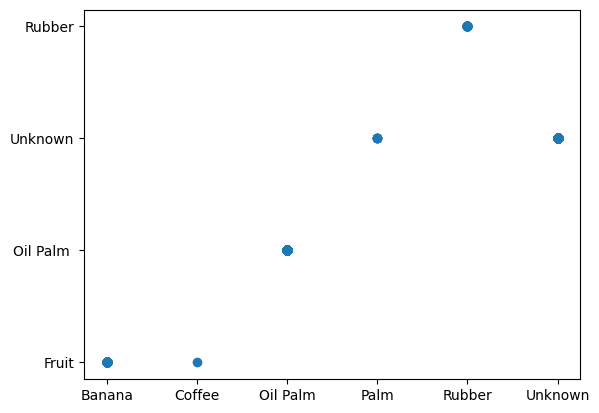

In [22]:
%matplotlib inline
CMR = get_df(r"/content/CMR_Cameroon_SDPT.json")
#CMR.head()
plt.scatter(CMR['common_name'], CMR['species_simp'])
CMR['species_simp'].unique()
CMR.info()
CMR.describe(include=['object'])
#CMR.plot(column='common_name', edgecolor='black', cmap='tab10', figsize=(10, 10), legend=True)
#plt.title("Cameroon: resources")
#plt.show()

In [8]:
CMR['geometry'].unique()

<GeometryArray>
[<POLYGON ((9.429 4.168, 9.423 4.174, 9.422 4.173, 9.422 4.172, 9.422 4.171, ...>,
 <POLYGON ((9.469 4.164, 9.468 4.171, 9.463 4.167, 9.463 4.165, 9.464 4.164, ...>,
 <POLYGON ((9.441 4.156, 9.444 4.16, 9.435 4.169, 9.432 4.165, 9.441 4.156, 9...>,
 <POLYGON ((9.433 4.164, 9.429 4.168, 9.426 4.164, 9.428 4.162, 9.429 4.162, ...>,
 <POLYGON ((9.428 4.162, 9.426 4.164, 9.423 4.167, 9.42 4.164, 9.423 4.161, 9...>,
 <POLYGON ((9.463 4.165, 9.463 4.166, 9.463 4.166, 9.454 4.158, 9.455 4.157, ...>,
     <POLYGON ((9.422 4.162, 9.417 4.166, 9.415 4.164, 9.419 4.16, 9.422 4.162))>,
 <POLYGON ((9.463 4.164, 9.463 4.164, 9.463 4.165, 9.456 4.157, 9.456 4.157, ...>,
 <POLYGON ((9.435 4.162, 9.433 4.164, 9.431 4.161, 9.426 4.155, 9.428 4.154, ...>,
 <POLYGON ((9.464 4.163, 9.464 4.164, 9.457 4.157, 9.457 4.157, 9.458 4.157, ...>,
 ...
                 <POLYGON ((9.382 4.119, 9.382 4.119, 9.382 4.119, 9.382 4.119))>,
                 <POLYGON ((9.384 4.118, 9.383 4.118, 9.383 4.118,

# **Description of the CMR data set**

the data set contains 697 entries into 15 columns.


In [ ]:
DRC = get_df(r"/content/COD_Democratic Republic of Congo_SDPT.json")
DRC
DRC.plot(column='species', edgecolor='black', cmap='tab10', figsize=(10, 10), legend=True)
plt.title("DRC: plant species")
plt.show()

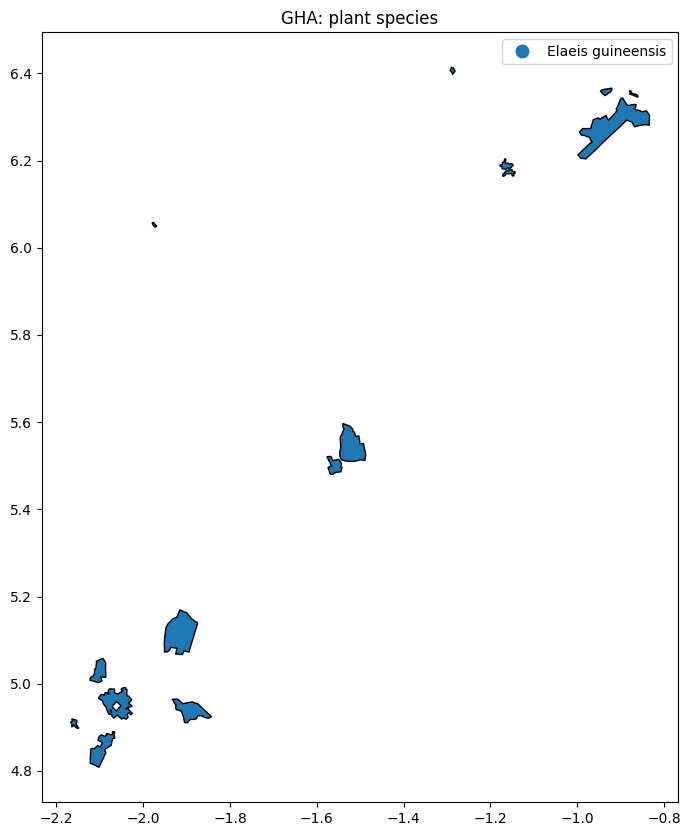

In [ ]:
GHA = get_df(r"/content/GHA_Ghana_SDPT.json")
GHA
GHA.plot(column='species', edgecolor='black', cmap='tab10', figsize=(10, 10), legend=True)
plt.title("GHA: plant species")
plt.show()
